# Implementation of a Markov Chain Monte Carlo (MCMC) with the Metropolis algorithm.

We will follow the steps described in the excellent article in introduction to the MCMC of David W. Hogg and Daniel Foreman-Mackey, available [ici](https://ui.adsabs.harvard.edu/abs/2018ApJS..236...11H/abstract).
Section 3 will be particularly useful for this example.

You can install `tqdm` if you want to display an indicator of progress in the MCMC loop.
For installation, the python -M pip install tqdm` command should work.
For use, simply place your generator (`Range ()`) in the TQDM.TQDM () `:::) function:

```python
for i in tqdm.tqdm(range(10)):
    # do something
    pass
```

In [1]:
from collections.abc import Callable
import numpy as np
import matplotlib.pyplot as plt
import tqdm

rng = np.random.default_rng()

## One-dimensional density function (Problems 2 and 3 of the article)
### Gaussian density

For this first exercise, we will implement the Metropolis algorithm and apply it to a unidimensional normal distribution.

Use the following information:

- The density function $ P (\ Theta) $ is a Gaussian with a dimension with average of $ \ mu = 2 $ and a variance $ \ sigma^2 = 2 $.
- The distribution of proposal $ q (\ theta '| \ Theta) $ is a Gaussian for $ \ theta' $ with an average $ \ mu = \ Theta $ and a standard deviation $ \ sigma = $ 1.
- The initial point of the MCMC is $ \ Theta = $ 0.
- The MCMC must perform $ 10^4 $ iterations.

The equation of normal distribution is

$$
p(\theta) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left[ -\frac{(\theta - \mu)^2}{2 \sigma^2}\right].
$$

However, to avoid digital errors, you use your logarithm. ** Code directly a function for $\ln p(\theta)$** (do not just use `np.log` on a Gaussian).

In [2]:
def log_gaussian(x, mean=2, var=2) -> float:
    return -0.5 * (x - mean) ** 2 / var - 0.5 * np.log(2 * np.pi * var)

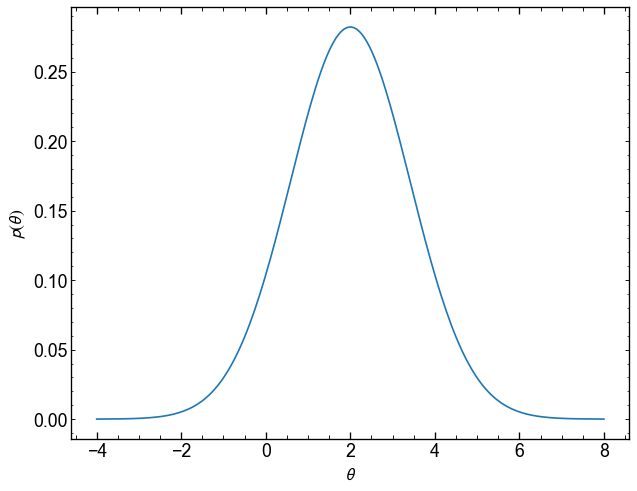

In [3]:
theta_test = np.linspace(-4, 8, num=200)
plt.plot(theta_test, np.exp(log_gaussian(theta_test)))
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

We can now implement the Metropolis algorithm.

We want our algorithm to be applicable to any density of (log-) probability which accepts an argument $ \ Theta $ scalar. We can therefore give `log_Density` (our above probability function) in the function argument.

In [4]:
def mcmc_metropolis(
    log_density: Callable,
    theta0: float,
    nsteps: int,
    q_scale: float = 1.0
) -> np.ndarray[float]:
    """
    - log_density: log-density function, accepts a theta argument
    - theta0: initial value of theta for the MCMC
    - nsteps: number of steps to take in the MCMC
    - q_scale: standard deviation of the proposal distribution.
    
    The function returns an array of samples for theta.
    """
    theta_arr = np.empty(nsteps)

    theta = theta0
    for i in tqdm.tqdm(range(nsteps)):
        thetap = rng.normal(loc=theta, scale=q_scale)
        lnp_theta = log_density(theta)
        lnp_thetap = log_density(thetap)

        lnr = np.log(rng.uniform(low=0.0, high=1.0))

        if lnp_thetap - lnp_theta > lnr:
            theta = thetap
        theta_arr[i] = theta
    
    return theta_arr
    


Apply the algorithm to obtain 10,000 samples.

In [5]:
samples = mcmc_metropolis(log_gaussian, 0.0, 10_000, q_scale=1.0)

100%|██████████| 10000/10000 [00:00<00:00, 326445.63it/s]


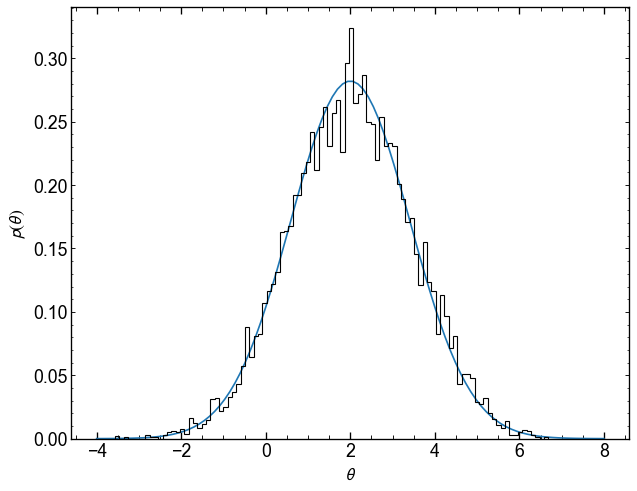

In [6]:
theta_test = np.linspace(-4, 8, num=100)
plt.plot(theta_test, np.exp(log_gaussian(theta_test)))
plt.hist(samples, density=True, histtype="step", color="k", bins=100)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

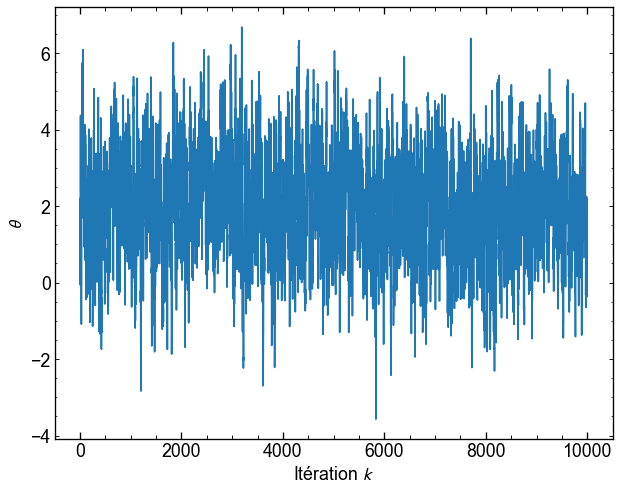

In [7]:
plt.plot(samples)
plt.xlabel("Itération $k$")
plt.ylabel(r"$\theta$")
plt.show()

### Impact of the proposal distribution scale

Test different scales for the distribution of proposal (`q_scale`). What is the impact on sampling? Test `q_Scale = 10000 'and` q_scale = 1e-5`.

100%|██████████| 10000/10000 [00:00<00:00, 317692.54it/s]


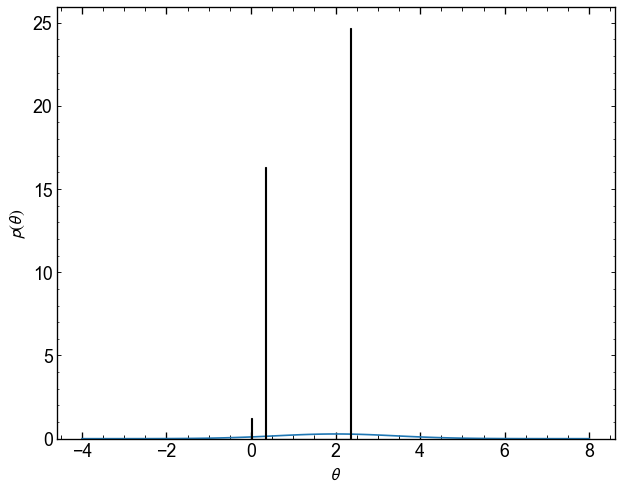

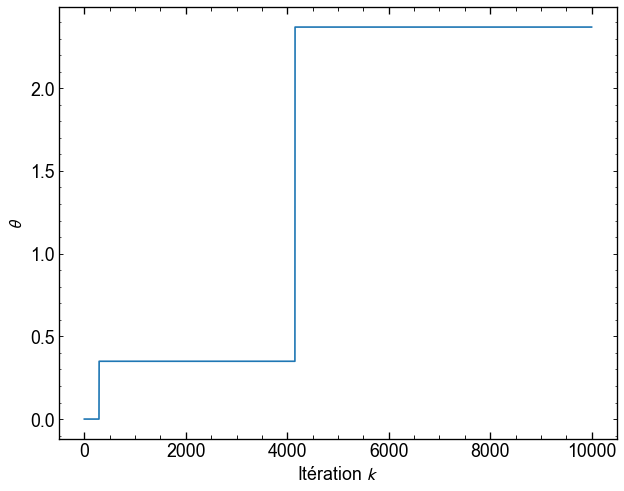

In [8]:
samples = mcmc_metropolis(log_gaussian, 0.0, 10_000, q_scale=1e4)

theta_test = np.linspace(-4, 8, num=100)
plt.plot(theta_test, np.exp(log_gaussian(theta_test)))
plt.hist(samples, density=True, histtype="step", color="k", bins=100)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

plt.plot(samples)
plt.xlabel("Itération $k$")
plt.ylabel(r"$\theta$")
plt.show()

We see that a large standard deviation for the distribution of proposals ensure that can proposals are accepted, so we move very little in the spaces space.

100%|██████████| 10000/10000 [00:00<00:00, 321740.37it/s]


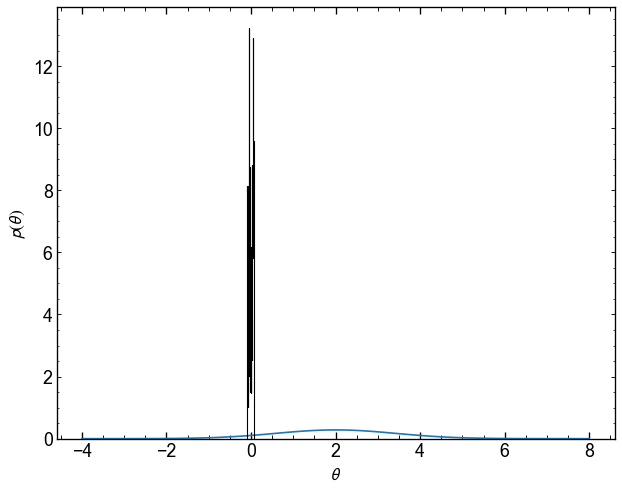

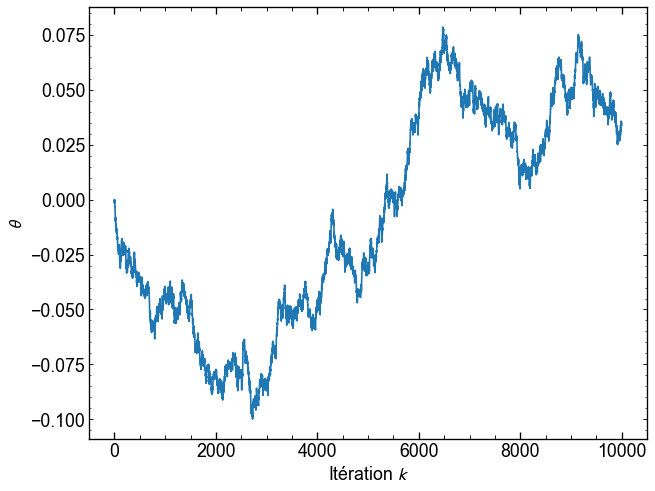

In [9]:
samples = mcmc_metropolis(log_gaussian, 0.0, 10000, q_scale=1e-3)

theta_test = np.linspace(-4, 8, num=100)
plt.plot(theta_test, np.exp(log_gaussian(theta_test)))
plt.hist(samples, density=True, histtype="step", color="k", bins=100)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

plt.plot(samples)
plt.xlabel("Itération $k$")
plt.ylabel(r"$\theta$")
plt.show()

For a very small standard deviation, we accept almost all the steps, but we move very slowly, as each step is taken from a very narrow Gaussian.

### Uniform distribution

Reuse your MCMC to sample a uniform distribution between 3 and 7, $ \ Mathcal {U} (0, 7) $. You will once again have to code the log of this probability density. Everything else in your `MCMC_metropolis` should work.

In [10]:
def log_uniform(theta, low=3, high=7):
    if low < theta < high:
        return - np.log(high - low)
    # We return to the log (0)
    return - np.inf

You can start by displaying the density according to $ \ Theta $. As the function accepts only one value of $ \ Theta $, you can use `MAP ()` to apply.

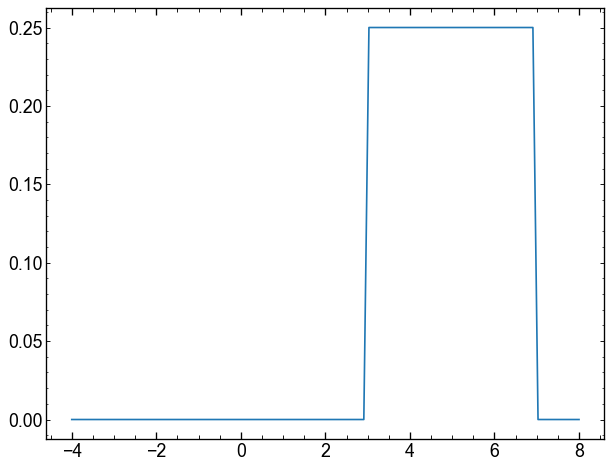

In [11]:
plt.plot(theta_test, np.exp(list(map(log_uniform, theta_test))))
plt.show()

100%|██████████| 10000/10000 [00:00<00:00, 331016.02it/s]


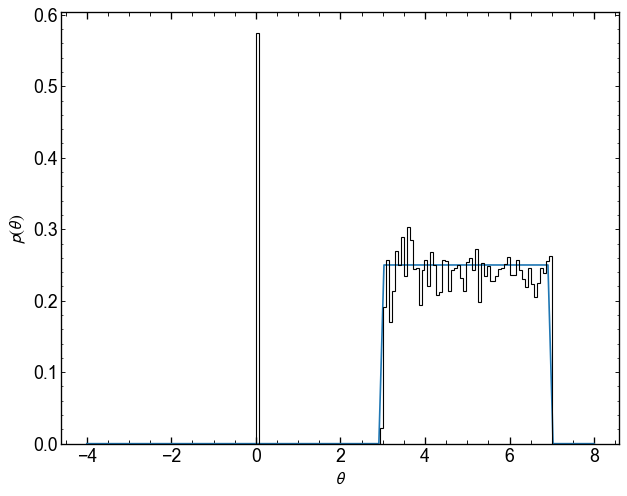

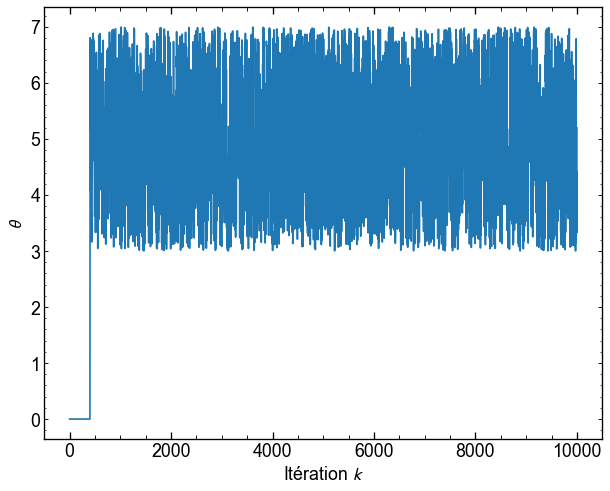

In [12]:
samples = mcmc_metropolis(log_uniform, 0.0, 10_000)

plt.plot(theta_test, np.exp(list(map(log_uniform, theta_test))))
plt.hist(samples, density=True, histtype="step", color="k", bins=100)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

plt.plot(samples)
plt.xlabel("Itération $k$")
plt.ylabel(r"$\theta$")
plt.show()

Here, the first samples remain taken at 0 because we initialized the MCMC outside the $ interval [3, 7] $.
You can adjust the initialization to be in the interval permitted.

100%|██████████| 10000/10000 [00:00<00:00, 315287.71it/s]


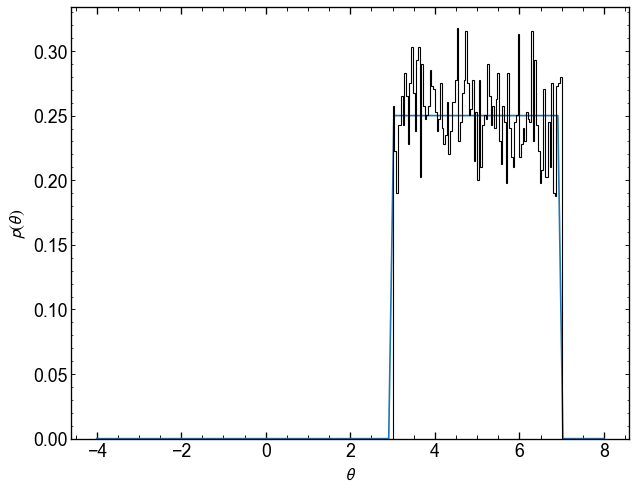

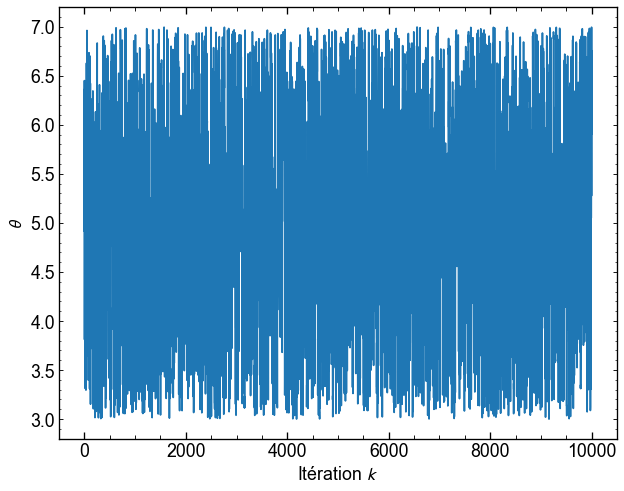

In [13]:
samples = mcmc_metropolis(log_uniform, 5.0, 10_000)

plt.plot(theta_test, np.exp(list(map(log_uniform, theta_test))))
plt.hist(samples, density=True, histtype="step", color="k", bins=100)
plt.xlabel(r"$\theta$")
plt.ylabel(r"$p(\theta)$")
plt.show()

plt.plot(samples)
plt.xlabel("Itération $k$")
plt.ylabel(r"$\theta$")
plt.show()

## 2D density function

To sample a more complex problem, we can generalize the above code to a 2D distribution.

### Probability density

We are going to sample a distribution $ P (\ Theta) $ where $ \ Theta $ contains two dimensions. Distribution will be a normal two -dimensional distribution with an average

$$
\ mu = \ Begin {Bmatrix} 0 \\ 0 \ End {Bmatrix}
$$

and a covariance matrix:

$$
V = \ Begin {Bmatrix} 2.0 & 1.2 \\ 1.2 & 2.0 \ End {Bmatrix}.
$$

The equation of a normal to n dimensions is given by:

$$
P (\ theta) = (2 \ pi)^{-n/2} \ det {(v)}^{-1/2} \ Exp {\ left (-\ frac {1} {2} (\ Theta-\ mu)^t V^{-1} (\ Theta-\ Mu)
$$

You can code the log of this density in the cell below. It should accept a parameter `Theta` containing two values.

In [14]:
def log_gaussian_density_2d(x: np.ndarray[float]) -> float:
    x = np.asarray(x)
    ndim = 2
    mu = np.array([0.0, 0.0])
    cov = np.array([[2.0, 1.2], [1.2, 2.0]])
    assert len(x) == ndim, (
        f"Wrong number of input dimensions. Got {len(x)}, expected {ndim}"
    )
    # @ is a matrix multiplication. Equivalent to NP.DOT or NP. MATMUL.
    p = (
        -0.5 * np.log(np.linalg.det(cov)) - 0.5 * ndim * (2 * np.pi)
        - 0.5 * (x - mu) @ np.linalg.inv(cov) @ (x - mu)
    )
    return p

As we know the analytical probability and that it is calculated in a reasonable time, it can be displayed on a grid to ensure that the function the expected result.
It will also be useful to verify that our MCMC samples give the right distribution.

In [15]:
x_check = np.linspace(-5, 5, num=100)
y_check = x_check.copy()

gauss_grid = np.empty((len(x_check), len(y_check)))
for i, xc in enumerate(x_check):
    for j, yc in enumerate(y_check):
        gauss_grid[j, i] = log_gaussian_density_2d([xc, yc])

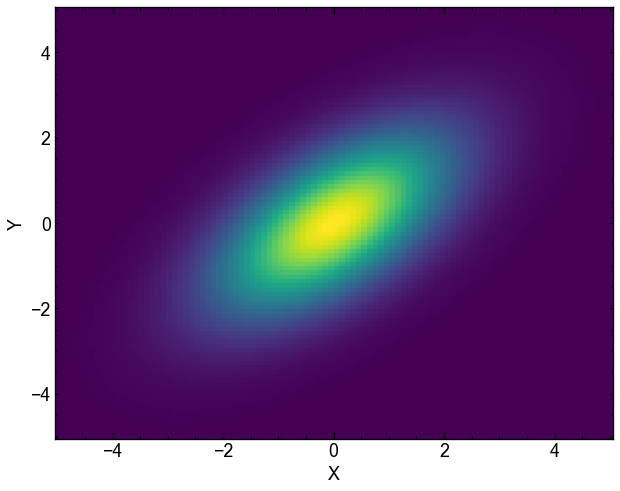

In [16]:
plt.pcolormesh(x_check, y_check, np.exp(gauss_grid))
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

### Metropolis algorithm

For Metropolis algorithm, you can copy your previous function and modify it so that it works with a $ \ TheTA $ 2D parameter.

Use a 2D normal proposal distribution with an identity covariance matrix. `RNG.Multivariat_Nommal` should operate.

In [17]:
from typing import Union

def mcmc_metropolis(
    log_density: Callable,
    theta0: np.ndarray[float],
    nsteps: int,
    q_var: Union[float, np.ndarray[float]] = 1.0
) -> np.ndarray[float]:
    """
    - log_density: fonction de log-densité, accepte un argument theta
    - theta0: valeur initiale de theta pour le MCMC
    - nsteps: nombre de pas à faire dans le MCMC
    - q_var: variance ou covariance de la distribution de proposition. Peut-être:
      - Un scalaire si tous les paramètres ont la même variance et que la covariance est 0.
      - Un vecteur de la même taille que theta0 si la covariance est 0 mais que les variances sont différentes.
      - Une matrice de covariance ndim x ndim.

    La fonction retourne un tableau d'échantillons pour chaque paramètre
    avec un format (nsteps, ndim).
    """
    theta0 = np.asarray(theta0)
    ndim = len(theta0)

    theta_arr = np.empty((nsteps, ndim))

    q_var = np.asarray(q_var)
    if q_var.ndim == 0:
        cov = q_var * np.eye(ndim)
    elif q_var.ndim == 1 and len(q_var) == ndim:
        cov = np.diag(q_var)
    elif q_var.ndim == 2 and q_var.shape == (ndim, ndim):
        cov = q_var
    else:
        raise ValueError("Unexpected shape for q_var")

    theta = theta0
    for i in tqdm.tqdm(range(nsteps)):
        thetap = rng.multivariate_normal(theta, cov)
        lnp_theta = log_density(theta)
        lnp_thetap = log_density(thetap)

        lnr = np.log(rng.uniform(low=0.0, high=1.0))

        if lnp_thetap - lnp_theta > lnr:
            theta = thetap
        theta_arr[i] = theta
    
    return theta_arr

In [18]:
samples = mcmc_metropolis(log_gaussian_density_2d, [0.0, 0.0], 10_000)

100%|██████████| 10000/10000 [00:00<00:00, 20140.82it/s]


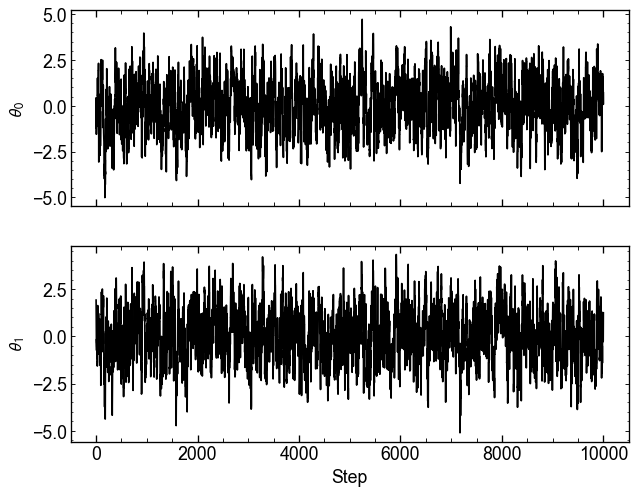

In [19]:
fig, axs = plt.subplots(nrows=samples.shape[-1], sharex=True)
for i in range(samples.shape[-1]):
    vals = samples[:, i]
    axs[i].plot(vals, "k")
    axs[i].set_ylabel(rf"$\theta_{i}$")
axs[-1].set_xlabel("Step")
plt.show()

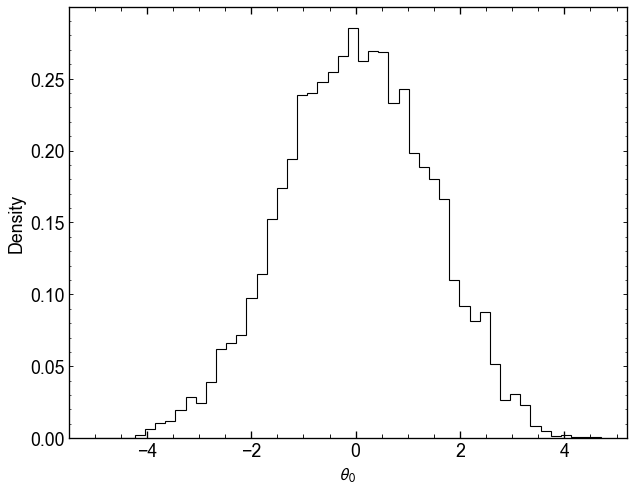

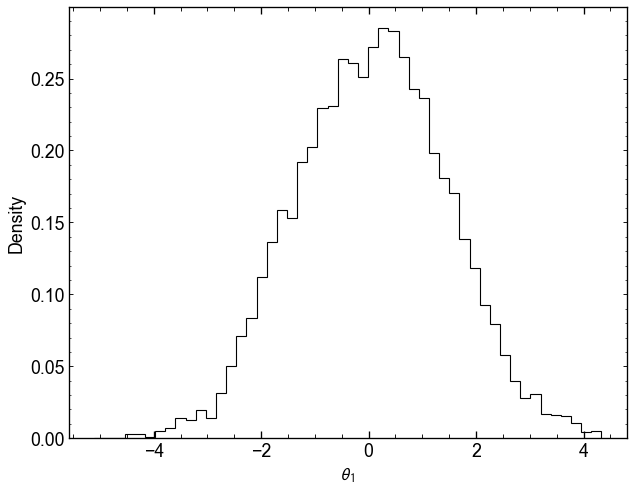

In [20]:
for i in range(samples.shape[1]):
    plt.hist(samples[:, i], bins=50, density=True, histtype="step", color="k")
    plt.xlabel(rf"$\theta_{i}$")
    plt.ylabel("Density")
    plt.show()

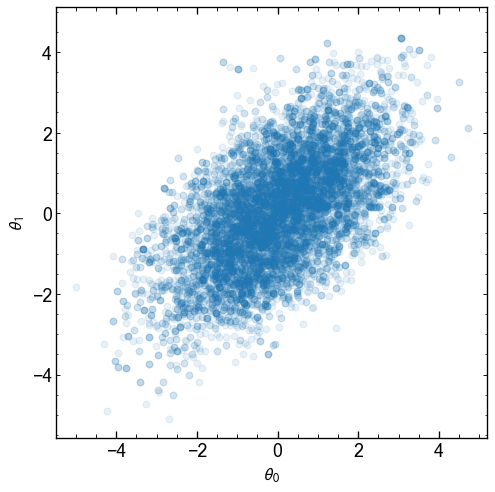

In [21]:
plt.scatter(*samples.T, alpha=0.1)
plt.axis("square")
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.show()

To display histograms with several dimensions, a _corner Plot_ is often useful. It is a graph showing 2D distribution as well as marginal distributions.

To use it, you will have to install `Corner` (` Python -M Pip Install Corner`).

Here is a link to the documentation: https://corner.readthedocs.io/en/latest/

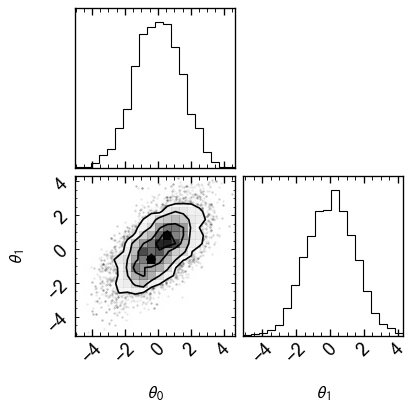

In [22]:
import corner

corner.corner(samples,labels=[rf"$\theta_{i}$" for i in range(samples.shape[1])])
plt.show()

## Bonus: MCMC applied to data analysis

Use your MCMC above to sample the posteriori distribution of duty 1.
You will need to copy your code for the model, distributions and imports of data.

In this case, you can define a distribution `log_Posterior` by adding the PRIOR log and likelihood with` np.log () `. Something like:

```python
def log_posterior(param):
    lp = np.log(prior(param))
    if not np.isfinite(lp):
        return - np.inf
    return lp + np.log(likelihood(param, x, data, edata))
```

_NOTE: In general, it is preferable to code all the distributions in log directly. We use `np.log () here to be able to reuse the functions of duty 1, and because we know that there will be no digital problems in this specific case_